57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       404 non-null    float64
 1   1       404 non-null    float64
 2   2       404 non-null    float64
 3   3       404 non-null    float64
 4   4       404 non-null    float64
 5   5       404 non-null    float64
 6   6       404 non-null    float64
 7   7       404 non-null    float64
 8   8       404 non-null    float64
 9   9       404 non-null    float64
 10  10      404 non-null    float64
 11  11      404 non-null    float64
 12  12      404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       404 non-null    float

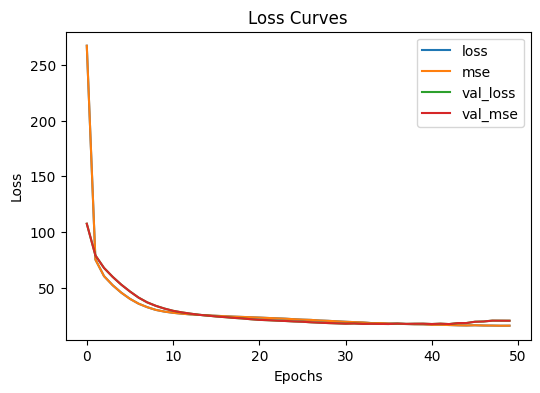

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([21.494555], dtype=float32)

In [1]:
# Data analysis and visualization
!pip install tensorflow numpy pandas matplotlib scikit-learn

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

# Preprocessing and evaluation
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
# X_trian feature   x_test = target field i.e price priditciton 
(X_train , y_train), (X_test , y_test) = tf.keras.datasets.boston_housing.load_data(
                                            path = 'boston_housing_npz',
                                            test_split = 0.2,
                                            seed = 42
                                        )

# Checking the data shape and type
(X_train.shape, type(X_train)), (X_test.shape, type(X_test)), (y_train.shape, type(y_train)), (y_test.shape, type(y_test)),

# Converting Data to DataFrame  
X_train_df = pd.DataFrame(X_train)
y_train_df = pd.DataFrame(y_train)

# Preview the training data  show first 10 df 
X_train_df.head(10)

# View summary of datasets  
X_train_df.info()
print('_'*40)
y_train_df.info()

# distribution of numerical feature values across the samples  =Provides mean, std, min, max, and quartile values for each feature column
X_train_df.describe()

# Create column transformer
ct = make_column_transformer(
    (MinMaxScaler(), [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12])
)

# Normalization and data type change  =Converts all arrays to float32 for model compatibility.
X_train = ct.fit_transform(X_train).astype('float32')
X_test = ct.transform(X_test).astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

# Distribution of X_train feature values after normalization
pd.DataFrame(X_train).describe()

# Reserve data for validation  Further splits training data:
#90% becomes training
#10% becomes validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

from tensorflow.keras import Input

# Set random seed  sset seed for reproducibility.
tf.random.set_seed(42)

# Building the model
#Defines a 3-layer neural network with ReLU activation for hidden layers and no activation for output (regression).
model = tf.keras.Sequential([
  Input(shape=(X_train.shape[1],), name='Input'),
  tf.keras.layers.Dense(units=10, activation='relu', name='Dense_1'),
  tf.keras.layers.Dense(units=100, activation='relu', name='Dense_2'),
  tf.keras.layers.Dense(units=1, name='Prediction')
])

# Compiling the model
model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01),#RMSprop with learning rate of 0.01.
    metrics=['mse']#Tracks Mean Squared Error during training.
)

# Training the model
history = model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=50,
    validation_data=(X_val, y_val)#Validates performance on the validation set.
)

# Preview the mean value of training and validation data
y_train.mean(), y_val.mean()

# Evaluate the model on the test data  Tests model on unseen data and prints loss and MSE.


print("Evaluation on Test data \n")
loss, mse = model.evaluate(X_test, y_test, batch_size=32)
print(f"\nModel loss on test set: {loss}")
print(f"Model mean squared error on test set: {(mse):.2f}")

# Plot the loss curves    Helps detect overfitting or underfitting.
pd.DataFrame(history.history).plot(figsize=(6, 4), xlabel="Epochs", ylabel="Loss", title='Loss Curves')
plt.show()

# Make predictions
y_pred = model.predict(X_test)

# View the first prediction
y_pred[0]